# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jliu2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jliu2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jliu2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [18]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [18]:
# 2. Print the shape
print(df.shape)

(11314, 4)


In [19]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum() # zero nulls, thus no need to remove

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [20]:
df.duplicated().sum() # zero duplicates, thus no need to remove

0

In [21]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [7]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def lower(string):
    return string.lower()

lower(test_string)

'this is a sentence with lots of caps.'

In [8]:
# 2. Make a function that removes all punctuation. 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punctuation(string):
    return re.sub(r'[^\w\s]', '', string) # subsituting everything except alphanumeric and spaces with nothing ''

remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [9]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(string):
    list_of_words = word_tokenize(string)
    
    not_stopwords = []
    
    for word in list_of_words:
        if word not in stopwords:
            not_stopwords.append(word)
    
    new_string = ' '.join(not_stopwords)
    
    return new_string

remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [10]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(string):
    ps = PorterStemmer() # initializing stemmer
    list_of_words = word_tokenize(string)
    
    list_of_stemmed_words = []
    
    for word in list_of_words:
        stemmed_word = ps.stem(word) # removing the ed, s, ing, etc. from verbs and such
        
        list_of_stemmed_words.append(stemmed_word)
        
    new_string = ' '.join(list_of_stemmed_words)
    return new_string

stem_words(test_string)

'i play and start play with player and we all love to play with play'

In [11]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def clean_words(string):
    string = lower(string)
    string = remove_punctuation(string)
    string = remove_stopwords(string)
    string = stem_words(string)
    return string

clean_words(test_string)

'play start play player love play play'

In [19]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(clean_words) # cleaning the messages in 11k rows
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [38]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values

y = df['topic_category'].values

In [39]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
from sklearn.feature_extraction.text import TfidfVectorizer # was actually already initialized above

vectorizer = TfidfVectorizer() # initialing vectorizer

In [40]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [41]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

In [42]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape)
print('There are', X.shape[1], 'features (columns)')

(11314, 119708)
There are 119708 features (columns)


# Split your data into Training and Testing data. 

In [43]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [44]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)

In [45]:
# Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [28]:
# 1. Make new predictions of our testing data. 

y_predictions = model.predict(X_test)

In [46]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


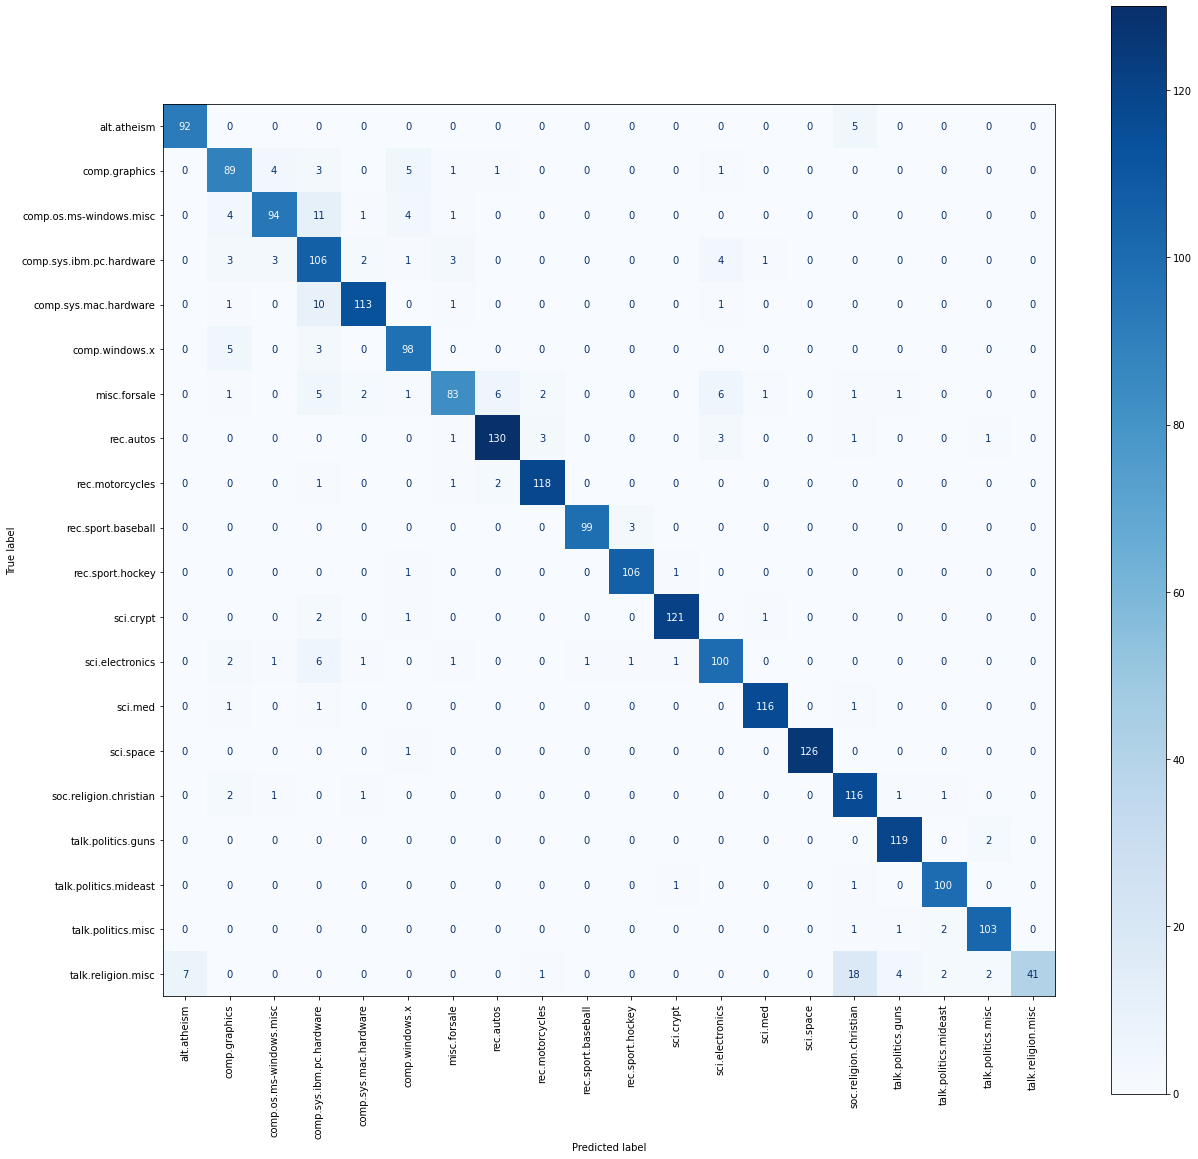

In [28]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(20, 20))

confusion_matrix = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)

plt.xticks(rotation = 90) # without the rotation, the x axis labels will be horizontal, overlapping

confusion_matrix

In [31]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_predictions, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.82      0.86      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.72      0.86      0.78       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.87      0.88      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [50]:
my_sentence = "Rumors say that America's politicians are debating over shooting artillery to end neighborhood gunfights."

# 1. Apply the text pipeline to your sentence

my_cleaned_sentence = clean_words(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

X_new = vectorizer.transform([my_cleaned_sentence])

# 3. Use the model to predict your new `X`. 

model.predict(X_new)

# 4. Print the prediction

probability_prediction = model.predict_proba(X_new)

for j, k in zip(model.classes_, probability_prediction.round(3)[0]):
    print(j, k)
    
# looks like the highest probability is: talk.politics.guns 0.363

alt.atheism 0.011
comp.graphics 0.001
comp.os.ms-windows.misc 0.004
comp.sys.ibm.pc.hardware 0.005
comp.sys.mac.hardware 0.008
comp.windows.x 0.001
misc.forsale 0.003
rec.autos 0.025
rec.motorcycles 0.011
rec.sport.baseball 0.012
rec.sport.hockey 0.022
sci.crypt 0.045
sci.electronics 0.005
sci.med 0.003
sci.space 0.019
soc.religion.christian 0.015
talk.politics.guns 0.363
talk.politics.mideast 0.344
talk.politics.misc 0.078
talk.religion.misc 0.024


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [2]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

print(df.shape)

df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [3]:
df.isnull().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [4]:
df.duplicated().sum()

57

In [5]:
df.drop_duplicates(inplace=True)

In [13]:
def clean_words_v2(string):
    string = lower(string)
    string = remove_punctuation(string)
    #string = remove_stopwords(string)
    string = stem_words(string)
    return string

In [14]:
df['Tweet_cleaned'] = df['Tweet'].apply(clean_words_v2) # cleaning the messages in 86k rows
df.head()

,Party,Handle,Tweet,Tweet_cleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote to savetheinternet proud ...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resid alta vist...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto note that hurrican ...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolici meet with repdarrensoto thank ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurrican season start on june 1st...


In [23]:
X = df['Tweet_cleaned'].values

y = df['Party'].values

In [24]:
vectorizer = TfidfVectorizer() # initializing vectorizer

vectorizer.fit(X)

X = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
# split into testing & training

model = MultinomialNB(alpha=.05) # initializing model

model.fit(X_train, y_train)

#fig, ax = plt.subplots(figsize=(20, 20))

#confusion_matrix = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)

#confusion_matrix

MultinomialNB(alpha=0.05)

In [25]:
y_predictions = model.predict(X_test)

print(classification_report(y_test, y_predictions, target_names = model.classes_))
# unfortunately, wasn't able to get a f1-score higher than 82%

              precision    recall  f1-score   support

    Democrat       0.82      0.80      0.81      8407
  Republican       0.82      0.83      0.82      8874

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281

